In [1]:
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np

In [2]:
def gaussian_kernel(x1, x2, l=0.5, sigma_f=0.2):
    m, n = x1.shape[0], x2.shape[0]
    dist_matrix = np.zeros((m, n), dtype=float)
    for i in range(m):
        for j in range(n):
            dist_matrix[i][j] = np.sum((x1[i] - x2[j]) ** 2)
    return sigma_f ** 2 * np.exp(-0.5 / 1 ** 2 * dist_matrix)

In [3]:
# generate observation points
def getY(X):
    X = np.asarray(X)
    Y = np.sin(X)*0.4 + np.random.normal(0, 0.05, size=X.shape)
    return Y.tolist()

In [4]:
def update(X, X_star, Y):
    X = np.asarray(X)
    X_star = np.asarray(X_star)
    K_YY = gaussian_kernel(X, X) # K(X,X)
    K_ff = gaussian_kernel(X_star, X_star) # K(X*,X*)
    K_Yf = gaussian_kernel(X, X_star) # K(X,X*)
    K_fY = K_Yf.T # K(X*,X)
    K_YY_inv = np.linalg.inv(K_YY + 1e-8 * np.eye(len(X))) # (N,N)

    mu_star = K_fY.dot(K_YY_inv).dot(Y)
    cov_star = K_ff - K_fY.dot(K_YY_inv).dot(K_Yf)
    return mu_star, cov_star

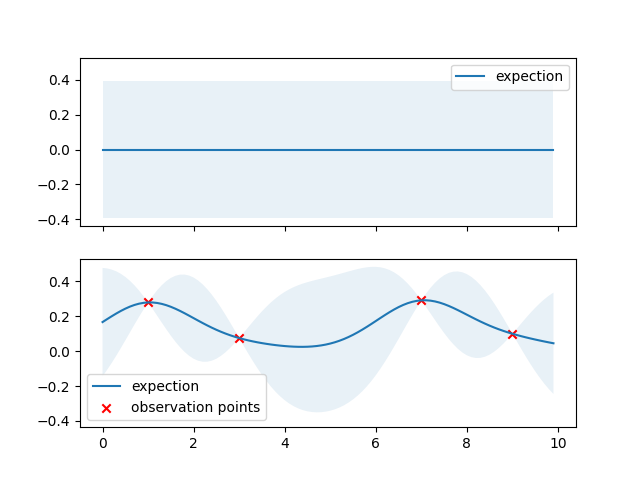

In [5]:
f, ax = plt.subplots(2, 1, sharex=True, sharey=True)
# prior probability distribution: mean value is all 0, covariation is defined by `gaussian_kernel`
X_pre = np.arange(0, 10, 0.1)
mu_pre = np.array([0]*len(X_pre))
Y_pre = mu_pre
cov_pre = gaussian_kernel(X_pre, X_pre)
uncertainty = 1.96 * np.sqrt(np.diag(cov_pre)) # 95% confidence interval
ax[0].fill_between(X_pre, Y_pre + uncertainty, Y_pre - uncertainty, alpha=0.1)
ax[0].plot(X_pre, Y_pre, label="expection")
ax[0].legend()

X = np.array([1, 3, 7, 9]).reshape(-1, 1)
Y = getY(X)
X_star = np.arange(0, 10, 0.1).reshape(-1, 1)
mu_star, cov_star = update(X, X_star, Y)
Y_star = mu_star.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov_star)) # 95% confidence interval
ax[1].fill_between(X_star.ravel(), Y_star + uncertainty, Y_star - uncertainty, alpha=0.1)
ax[1].plot(X_star, Y_star, label="expection")
ax[1].scatter(X, Y, label="observation points", c='red', marker='x')
ax[1].legend()
plt.show()